In [21]:
#Importing Libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

import warnings
warnings.filterwarnings('ignore')

#import os
#print(os.listdir("../input"))

In [22]:
#importing Data
images = np.load("olivetti_faces.npy")
labels = np.load("olivetti_faces_target.npy")

In [23]:
print("pics: ", images.shape)
print("labels: ", labels.shape)

pics:  (400, 64, 64)
labels:  (400,)


In [24]:
print("There are {} images in the dataset".format(len(images)))
print("There are {} unique targets in the dataset".format(len(np.unique(labels))))

There are 400 images in the dataset
There are 40 unique targets in the dataset


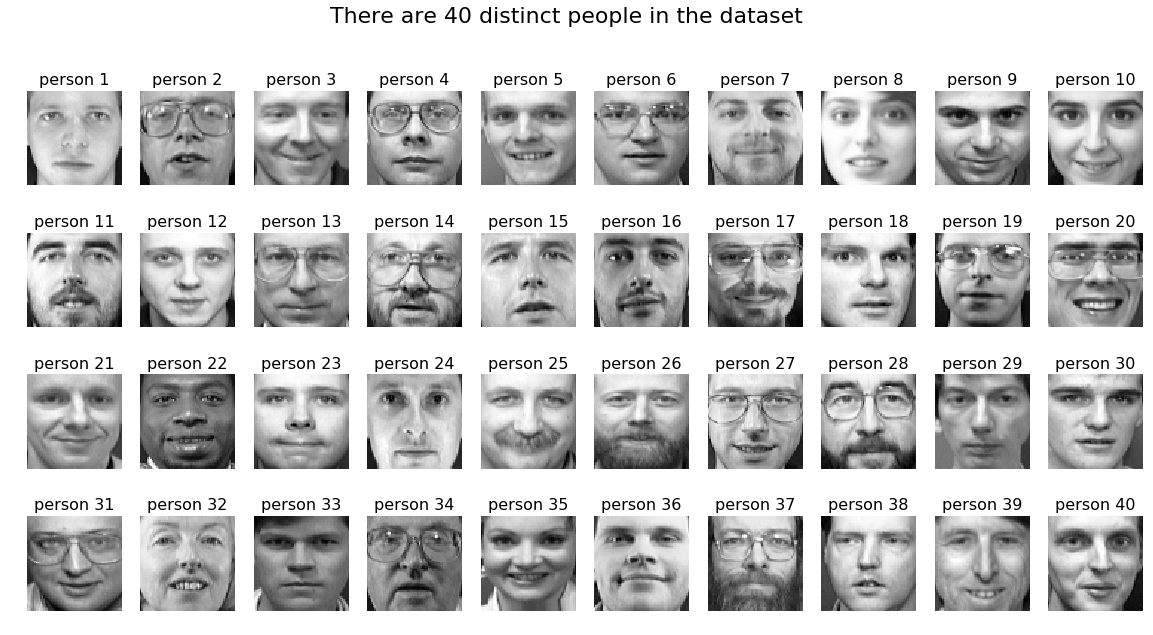

In [25]:
#Showing distinct peoples
fig = plt.figure(figsize=(20, 10))
columns = 10
rows = 4
for i in range(1, columns*rows +1):
    img = pics[10*(i-1),:,:]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap = plt.get_cmap('gray'))
    plt.title("person {}".format(i), fontsize=16)
    plt.axis('off')
    
plt.suptitle("There are 40 distinct people in the dataset", fontsize=22)
plt.show()


In [26]:
Xdata = pics # store images in Xdata
Ydata = labels.reshape(-1,1) # store labels in Ydata

In [27]:
#Splitting of dataset into training set and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(Xdata, Ydata, test_size = 0.2, random_state=46)

print("x_train: ",x_train.shape)
print("x_test: ",x_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

x_train:  (320, 64, 64)
x_test:  (80, 64, 64)
y_train:  (320, 1)
y_test:  (80, 1)


In [28]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2])
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1]*x_test.shape[2])

print("x_train: ",x_train.shape)
print("x_test: ",x_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

x_train:  (320, 4096)
x_test:  (80, 4096)
y_train:  (320, 1)
y_test:  (80, 1)


In [29]:
# Store accuracies of the machine learning methods for comparison at the end
list_names = []
list_accuracy = []

In [30]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(x_train, y_train)
LR_accuracy = round(lr.score(x_test, y_test)*100,2)

print("LR_accuracy is %", LR_accuracy)

list_names.append("Logistic Regression")
list_accuracy.append(LR_accuracy)

LR_accuracy is % 96.25


In [31]:
#Random Forest classifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(n_estimators = 400, random_state = 1)
rf.fit(x_train, y_train)
RF_accuracy = round(rf.score(x_test, y_test)*100,2)

print("RF_accuracy is %", RF_accuracy)

list_names.append("Random Forest")
list_accuracy.append(RF_accuracy)

RF_accuracy is % 93.75


In [32]:
#KNN Classifier

from sklearn.neighbors import KNeighborsClassifier

Knn = KNeighborsClassifier(n_neighbors = 1) # n_neighbors=1 gives the best result for this data
Knn.fit(x_train, y_train)
Knn_accuracy = round(Knn.score(x_test, y_test)*100,2)

print("Knn_accuracy is %", Knn_accuracy)

list_names.append("KNN")
list_accuracy.append(Knn_accuracy)

Knn_accuracy is % 91.25


In [33]:
#Reshaping for CNN

x_train = x_train.reshape(-1,64,64,1)
x_test = x_test.reshape(-1,64,64,1)

print("x_train: ",x_train.shape)
print("x_test: ",x_test.shape)

x_train:  (320, 64, 64, 1)
x_test:  (80, 64, 64, 1)


In [34]:
#Label Encoding

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding

y_train_ = to_categorical(y_train, num_classes = 40) # 40 distinct people
y_test_ = to_categorical(y_test, num_classes = 40)

print("y_train_ shape: ",y_train_.shape)
print("y_test_ shape: ",y_test_.shape)

y_train_ shape:  (320, 40)
y_test_ shape:  (80, 40)


In [ ]:
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

model = Sequential()

model.add(Conv2D(filters = 20, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (64,64,1)))

model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 50, kernel_size = (6,6),padding = 'Same', 
                 activation ='relu'))

model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 150, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (64,64,1)))

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(40, activation = "softmax"))

optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.7, 
                                            min_lr=0.00000000001)

epoch = 37
batch_size = 20

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=5,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.05, # Randomly zoom image 
        width_shift_range=0,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images
datagen.fit(x_train)

history = model.fit_generator(
                              datagen.flow(x_train,y_train_, batch_size=batch_size),
                              epochs = epoch, 
                              validation_data = (x_test,y_test_),
                              verbose = 2, 
                              steps_per_epoch=x_train.shape[0] // batch_size,
                              callbacks=[learning_rate_reduction]
                             )

Epoch 1/37
 - 7s - loss: 4.8943 - acc: 0.0125 - val_loss: 3.6914 - val_acc: 0.0000e+00
Epoch 2/37
 - 6s - loss: 3.6930 - acc: 0.0281 - val_loss: 3.7030 - val_acc: 0.0000e+00
Epoch 3/37
 - 6s - loss: 3.6972 - acc: 0.0125 - val_loss: 3.6958 - val_acc: 0.0000e+00
Epoch 4/37
 - 6s - loss: 3.7399 - acc: 0.0313 - val_loss: 3.6946 - val_acc: 0.0000e+00

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0007000000332482159.
Epoch 5/37
 - 6s - loss: 3.6885 - acc: 0.0500 - val_loss: 3.6951 - val_acc: 0.0000e+00


In [ ]:
#CNN accuracy

y_pred = model.predict_classes(x_test)

y_test = y_test.reshape(-1,)

diff = y_test - y_pred
diff = diff.reshape(-1,1)

true = 0
for i in range(0,len(diff)):
    if diff[i] == 0:
        true = true + 1

Cnn_accuracy = round(100*true/len(diff),2)

print("Cnn_accuracy is %", Cnn_accuracy)

list_names.append("CNN")
list_accuracy.append(Cnn_accuracy)

In [ ]:
# Plot the loss and accuracy curves for training and validation 
val_accuracy = history.history['val_acc']

accuracy = []
num_of_epochs = []
for i in range(1,epoch,4):
    accuracy.append(round(100*val_accuracy[i],3))
    num_of_epochs.append(i)

trace1 = go.Scatter(y = accuracy, x = num_of_epochs, mode = "lines")
data = [trace1]
layout = dict(title = 'CNN Accuracy',
              autosize=False,
              width=800,
              height=500,
              yaxis= dict(title= 'Accuracy (%)',gridwidth=2, gridcolor='#bdbdbd'),
              xaxis= dict(title= 'Number of Epochs',gridwidth=2, gridcolor='#bdbdbd'),
              font=dict(size=14)
             )
fig = dict(data = data, layout = layout)
py.iplot(fig)

In [ ]:
#Comparison of Learning Methods

df = pd.DataFrame({'METHOD': list_names, 'ACCURACY (%)': list_accuracy})
df = df.sort_values(by=['ACCURACY (%)'])
df = df.reset_index(drop=True)
df.head()

In [ ]:
trace1 = go.Bar(x = df.iloc[:,0].tolist(), y = df.iloc[:,1].tolist())

data1 = [trace1]
layout1 = go.Layout(
    title='Comparison of the Learning Methods',
    xaxis=dict(titlefont=dict(size=16)),
    yaxis=dict(title='ACCURACY (%)',gridwidth=1, gridcolor='#bdbdbd', range=[89, 99]),
    font=dict(size=16),
    bargap = 0.7,
    barmode='group')

fig = go.Figure(data=data1, layout=layout1)
py.iplot(fig, filename='grouped-bar')